In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Data loading
file_path = Path("Resources/crypto_data.csv")
file_data_df = pd.read_csv(file_path)

# Preview dataframe
file_data_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Get all the data for currencies that are currently being traded 
traded_crypto_df = file_data_df.loc[file_data_df['IsTrading'] == True, :]

# Drop the `IsTrading` column from the dataframe
traded_crypto_df = traded_crypto_df.drop('IsTrading', axis = 1)

# Display dataframe
traded_crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
# Remove all rows that have at least one null value
clean_traded_crypto_df = traded_crypto_df.dropna()

# Display dataframe
clean_traded_crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Filter for cryptocurrencies that have been mined
mined_crypto_df = clean_traded_crypto_df.loc[clean_traded_crypto_df['TotalCoinsMined'] > 0.0, :]

# Display dataframe
mined_crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Drop the `CoinName` and 'Unnamed: 0' columns from the dataframe
crypto_data_df = mined_crypto_df.drop(['Unnamed: 0', 'CoinName'], axis = 1)

# Reset dataframe index
crypto_data_df = crypto_data_df.reset_index(drop=True)

# Display dataframe
crypto_data_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2000000000
528,Scrypt,PoW/PoS,1.493105e+07,250000000
529,CryptoNight,PoW,9.802226e+08,1400222610
530,Equihash,PoW,7.296538e+06,21000000


In [7]:
# List dataframe data types
crypto_data_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [8]:
# Change data type of column 'TotalCoinSupply' to float
crypto_data_df = crypto_data_df.astype({'TotalCoinSupply': 'float64'})

# List dataframe data types
crypto_data_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [9]:
# One-hot encoding the dataframe
crypto_data_dummies = pd.get_dummies(crypto_data_df, drop_first = True)

# Display dataframe
crypto_data_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
## Comments: The number of columns (features) increased from 4 to 96 after the get_dummies procedure,
## This is attributed to the changing of features with text values into numerical data.

In [11]:
# Standardize the dataset

# Split data into scaled and non-scaled columns
non_scaled_columns = crypto_data_dummies.drop(['TotalCoinsMined', 'TotalCoinSupply'], axis = 1)
scaled_columns = crypto_data_dummies[['TotalCoinsMined', 'TotalCoinSupply']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_columns) 

# Create a dataFrame with the scaled data
scaled_columns_df = pd.DataFrame(scaled_data, columns = scaled_columns.columns)

# Create new dataframe from the transformed data by merging scaled and non-scaled columns
transformed_crypto_df = pd.merge(scaled_columns_df, non_scaled_columns, left_index = True, right_index = True)

# Display the dataframe
transformed_crypto_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.123317,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,-0.116781,-0.149176,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,-0.095613,-0.132179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,-0.116948,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Initialize PCA model
pca = PCA(n_components = 0.90)

# Get the principal components
transformed_crypto_pca = pca.fit_transform(transformed_crypto_df)

# Display dataframe shape
transformed_crypto_pca.shape

(532, 12)

In [13]:
# Transform PCA data to a dataFrame

# Create list containing the column names
column_names = []
for x in range(1,len(transformed_crypto_pca[0]) + 1):
    column_names.append(f"principal component {x}")

# Create a dataFrame with the PCA results    
df_transformed_crypto_pca = pd.DataFrame(data = transformed_crypto_pca, columns = column_names)

# Preview dataframe
df_transformed_crypto_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12
0,-0.209277,-0.801760,0.172975,-0.672387,-0.028019,-0.027345,0.002167,-0.016857,-0.047427,-0.023029,-0.007850,0.015797
1,-0.187390,-0.804253,0.162555,-0.673031,-0.028774,-0.027208,0.002271,-0.017850,-0.047569,-0.023068,-0.007753,0.015896
2,3.529673,-0.305515,2.915412,0.414782,-0.163305,-0.259270,-0.278503,-0.152146,0.747551,0.360582,-0.233799,-0.070236
3,-0.180157,0.694296,-0.165778,0.239946,-0.278392,-0.614743,0.624068,-0.015117,0.027787,0.009236,-0.026158,-0.026473
4,-0.173289,0.688574,-0.154398,0.131930,-0.212559,-0.104395,-0.242159,0.002997,0.113058,-0.125668,0.058178,-0.129383


In [14]:
## Comments: The number of columns (features) was reduced from 96 to 12 after the PCA analysis.

In [15]:
# Initialize t-SNE model
tsne = TSNE(learning_rate = 250)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_transformed_crypto_pca)

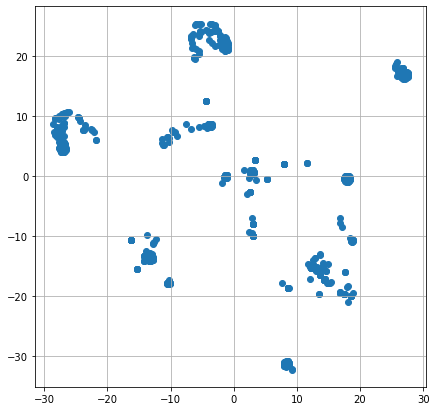

In [16]:
# The dataset has 2 columns
# Prepare to plot the dataset

# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

# Plot the results
plt.figure(figsize = (7, 7))
plt.grid()
plt.scatter(x, y)
plt.show()

In [17]:
## Comments: Base on the generated plot, I am able to observe at least 8 clusters of varying sizes.

In [18]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_crypto_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,1867.808271
1,2,1183.567502
2,3,970.535027
3,4,777.759607
4,5,664.003733
5,6,568.787310
6,7,516.185556
7,8,462.578159
8,9,436.874217
9,10,408.515305


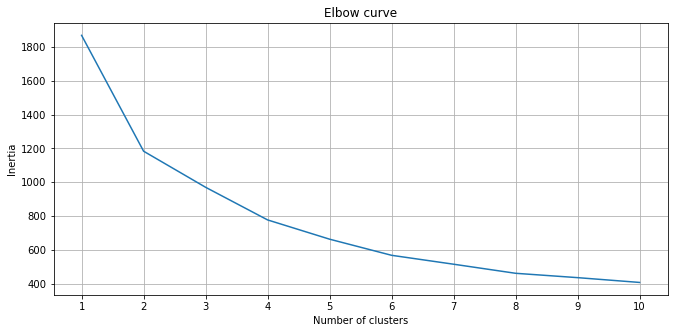

In [19]:
# Plot the elbow curve to find the best candidate(s) for k
plt.figure(figsize = (11, 5))
plt.grid()
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [20]:
## Comments: I would say that the location of the elbow of the plot is around K=6.

In [21]:
## Recommendations: Based on the analysis done I can say that the cryptocurrencies can be be clustered together. 
## The Dimensionality Reduction analysis using PCA and t-SNE showed at least 8 possible clusters while with the
## k-Means cluster analysis, the cluster count is around K=6.